#Summarizing the kmeans clsutering algorithm
1. randomly choose k examples as initial centroids
2. while true:
    create k clusters by assigning each example
        to closest centroid
    compute k new centroids by averaging
        examples in each cluster
    if centroids dont change:
        break

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


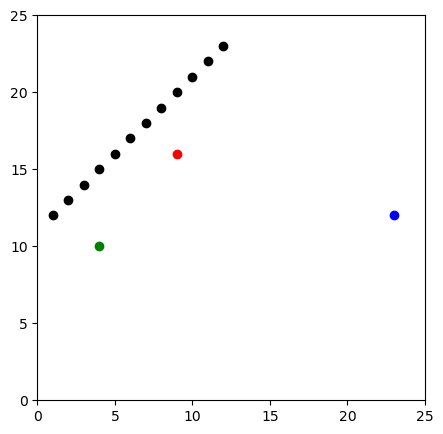

In [4]:
#initialization
#here we can use iris dataset
#i have taken random sample for x and y
df=pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9,10,11,12],
'y':[12,13,14,15,16,17,18,19,20,21,22,23]})
np.random.seed(200)
k=3
#to choose the first centroid
# centroid[i]=[x,y]
centroids={
    i+1:[np.random.randint(0,25),np.random.randint(0,25)]
    for i in range(k)
}
fig=plt.figure(figsize=(5,5))
plt.scatter(df["x"],df["y"],color="k")
colmap={1:"r",2:"g",3:"b"}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,25)
plt.ylim(0,25)
plt.show()

   x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  12             60.0             11.0            484.0        2     g
1  2  13             46.0              7.0            442.0        2     g
2  3  14             34.0              5.0            402.0        2     g
3  4  15             24.0              5.0            364.0        2     g
4  5  16             16.0              7.0            328.0        2     g


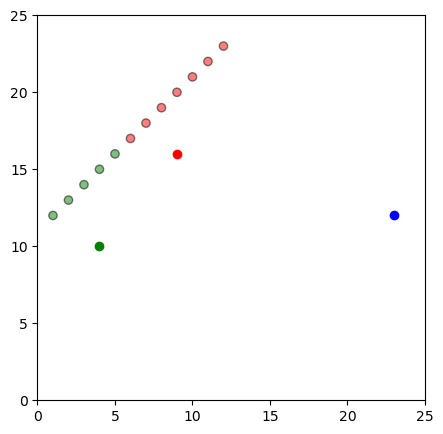

In [7]:
#assignment stage
def assignment(df,centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2-(y1-y2)^2)
        df['distance_from_{}'.format(i)]=(
        (np.sqrt((df['x']-centroids[i][0])**2
        +df['y']-centroids[i][1])**2))
    centroids_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys() ]
    df["closest"]=df.loc[:,centroids_distance_cols].idxmin(axis=1)
    df["closest"]=df["closest"].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df["closest"].map(lambda x: colmap[x])
    return df
df=assignment(df,centroids)
print(df.head())

fig=plt.figure(figsize=(5,5))
plt.scatter(df["x"],df["y"],color=df["color"],alpha=0.5,edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,25)
plt.ylim(0,25)
plt.show()
        

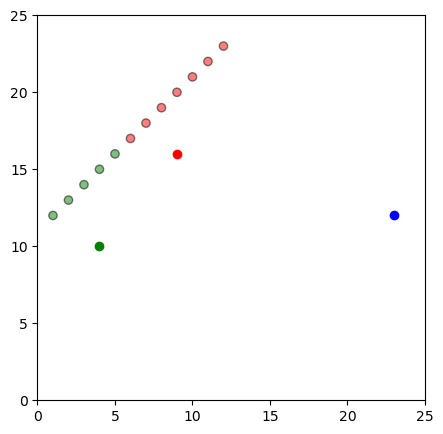

In [8]:
#reapeat assignment stage
fig=plt.figure(figsize=(5,5))
plt.scatter(df["x"],df["y"],color=df["color"],alpha=0.5,edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,25)
plt.ylim(0,25)
plt.show()

In [11]:
#implementing kmeans using a library
df=pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9,10,11,12],
'y':[12,13,14,15,16,17,18,19,20,21,22,23]})
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

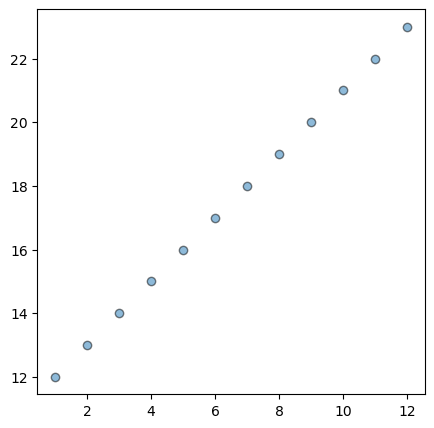

In [14]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df["x"],df["y"],alpha=0.5,edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,25)
plt.ylim(0,25)
plt.show()